In [1]:
import numpy as np
import torch
from dataset_mimo import LabelsForData
from utils.evaluation import ConceptEvaluation
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
sigle_dx_file = 'utils/ccs/ccs_single_dx_tool_2015.csv'
multi_dx_file = 'utils/ccs/ccs_multi_dx_tool_2015.csv'
label4data = LabelsForData(multi_dx_file, sigle_dx_file)

In [3]:
dict_file = '../outputs/mimo/data/mimic/inputs.dict'
dict_mimic = pickle.load(open(dict_file, 'rb'))
dict_mimic_inverse = {v:k for k, v in dict_mimic.items()}
eval_mimic = ConceptEvaluation(dict_mimic_inverse, label4data)

In [1]:
# dict_mimic

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_file = '../outputs/mimo/model/seq_prediction/mimic/next_dx_att_lr_0.1_bs_32_e_20.0_l_0.5_tr_0.8/pytorch_model.bin'
model = torch.load(model_file)
model = model.to(device)

In [5]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
buf = 'Number of Model parameters: {}'.format(params)
print(buf)

Number of Model parameters: 11850779


In [13]:
exaples = model.encoder.embed_dag.weight.cpu().detach().numpy()[1:11,:]

In [14]:
np.savetxt('exaples.txt', exaples, delimiter=',')   # X is an array

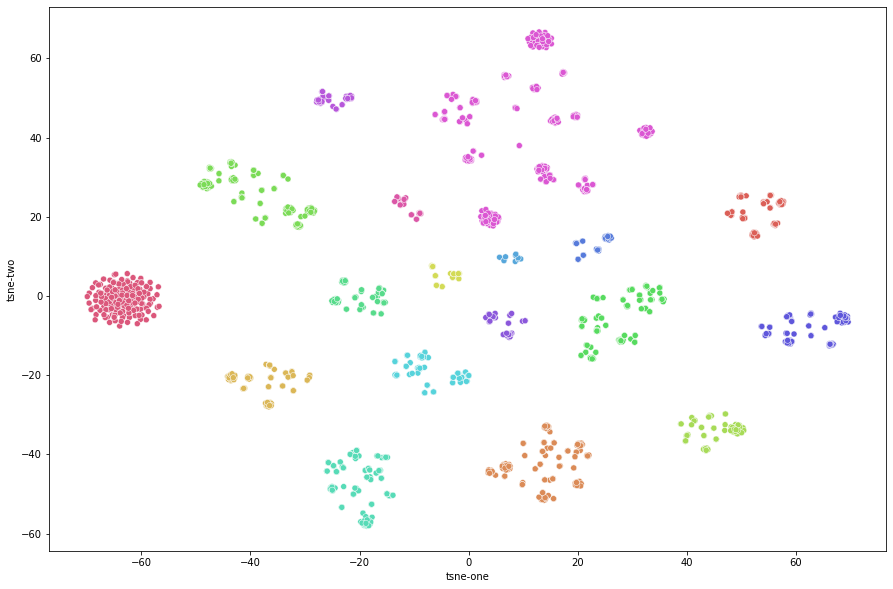

In [6]:
x_2d, labels = eval_mimic.get_sample_tsne(model.encoder.embed_dag.weight.cpu().detach().numpy(), 2000)
cms_df_subset={}
cms_df_subset['tsne-one'] = x_2d[:,0]
cms_df_subset['tsne-two'] = x_2d[:,1]
cms_df_subset['y'] = np.array(labels)
plt.figure(figsize=(15,10))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    palette=sns.color_palette("hls", 18),
    data=cms_df_subset,
    alpha=1,
    legend=False
)

#add cluster label
# for label in range(18):
#     index = labels.index(label)
#     plt.annotate(label+1, 
#              (x_2d[index][0], x_2d[index][1]),
#              horizontalalignment='center',
#              verticalalignment='center',
#              size=20, weight='bold'
#                 ) 